In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


In [3]:
cities

['alfenas',
 'iqaluit',
 'saint-pierre',
 'tiksi',
 'kashgar',
 'timbuktu',
 'isafjordur',
 'waitangi',
 'port-aux-francais',
 'east london',
 'plettenberg bay',
 'bredasdorp',
 'edinburgh of the seven seas',
 'albany',
 'bethel',
 'ketchikan',
 'fale old settlement',
 'port elizabeth',
 'kujuvar',
 'geraldton',
 'novodmitriyevskaya',
 'okhotsk',
 'san julian',
 'kruisfontein',
 'lata',
 'fortuna',
 'saint-philippe',
 'hermanus',
 "st. john's",
 'tranovaho',
 'alofi',
 'puerto ayora',
 'margaret river',
 'yellowknife',
 'enewetak',
 'grytviken',
 'greymouth',
 'lebu',
 'yuzhno-kurilsk',
 'lihue',
 'papatowai',
 'blackmans bay',
 'qaqortoq',
 'ribeira grande',
 'andovoranto',
 'luderitz',
 'puerto natales',
 'ushuaia',
 'port alberni',
 'kapuskasing',
 'iskateley',
 'wailua homesteads',
 'vila franca do campo',
 'kolokani',
 'maumere',
 'anibare',
 'adamstown',
 'raja',
 'alliance',
 'la passe',
 'belmonte',
 'pithoragarh',
 'zaozersk',
 'fukuecho',
 'cannonvale',
 'thompson',
 'rio gra

# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude¶
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 
#city needed next in url


# Define an empty list to fetch the weather data for each city
city_data = []
# url list for diagnostics
Url_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ", "+")
    
    Url_list.append(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        response = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        weat_city = response['name']
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
   #the subtraction of 272 is to convert Kelvin to Celcius 
        city_max_temp = response['main']['temp_max'] - 272.15
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        timezone = response['timezone']
        city_date = response['dt']


        # Append the City information into city_data list
        city_data.append({"City": weat_city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Timezone": timezone,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alfenas
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | saint-pierre
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | kashgar
Processing Record 6 of Set 1 | timbuktu
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | plettenberg bay
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | kujuvar
City not found. Skipping...
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | novodmitriyevsk

Processing Record 36 of Set 4 | cururupu
Processing Record 37 of Set 4 | jamestown
Processing Record 38 of Set 4 | bairnsdale
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | waingapu
Processing Record 41 of Set 4 | mandera
Processing Record 42 of Set 4 | clinton
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | putignano
Processing Record 45 of Set 4 | dolgoderevenskoye
Processing Record 46 of Set 4 | barkot
Processing Record 47 of Set 4 | hengshui
Processing Record 48 of Set 4 | gounou gaya
Processing Record 49 of Set 4 | baran
Processing Record 0 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 1 of Set 5 | san luis de la loma
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | rikaze
Processing Record 4 of Set 5 | las heras
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | arendal
Processing Record 7 of Set 5 | yelovo
Processing Record 8 of Set 5 | n'zeto
Processing Record 9 of Set 

Processing Record 27 of Set 8 | kremenki
Processing Record 28 of Set 8 | itaituba
Processing Record 29 of Set 8 | gwandu
Processing Record 30 of Set 8 | puerto aysen
Processing Record 31 of Set 8 | basco
Processing Record 32 of Set 8 | hsinchu
Processing Record 33 of Set 8 | conception bay south
Processing Record 34 of Set 8 | gunjur
Processing Record 35 of Set 8 | acapulco de juarez
Processing Record 36 of Set 8 | ciudad lazaro cardenas
Processing Record 37 of Set 8 | fada
Processing Record 38 of Set 8 | maubara
City not found. Skipping...
Processing Record 39 of Set 8 | nogliki
Processing Record 40 of Set 8 | pemangkat
Processing Record 41 of Set 8 | siwa oasis
Processing Record 42 of Set 8 | tari
Processing Record 43 of Set 8 | ratanpur
Processing Record 44 of Set 8 | hammerfest
Processing Record 45 of Set 8 | taksimo
Processing Record 46 of Set 8 | bahia de kino
Processing Record 47 of Set 8 | bengkulu
Processing Record 48 of Set 8 | viligili
City not found. Skipping...
Processing 

Processing Record 16 of Set 12 | tumwater
Processing Record 17 of Set 12 | imbituba
Processing Record 18 of Set 12 | katutura
Processing Record 19 of Set 12 | lodwar
Processing Record 20 of Set 12 | ruokolahti
Processing Record 21 of Set 12 | sabang
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Checking data
city_data

[{'City': 'Alfenas',
  'Lat': -21.4292,
  'Lng': -45.9472,
  'Max Temp': 25.82000000000005,
  'Humidity': 63,
  'Cloudiness': 99,
  'Wind Speed': 2.32,
  'Country': 'BR',
  'Timezone': -10800,
  'Date': 1697382706},
 {'City': 'Iqaluit',
  'Lat': 63.7506,
  'Lng': -68.5145,
  'Max Temp': 0.8500000000000227,
  'Humidity': 86,
  'Cloudiness': 100,
  'Wind Speed': 3.6,
  'Country': 'CA',
  'Timezone': -14400,
  'Date': 1697382707},
 {'City': 'Saint-Pierre',
  'Lat': -21.3393,
  'Lng': 55.4781,
  'Max Temp': 25.82000000000005,
  'Humidity': 73,
  'Cloudiness': 0,
  'Wind Speed': 2.57,
  'Country': 'RE',
  'Timezone': 14400,
  'Date': 1697382707},
 {'City': 'Tiksi',
  'Lat': 71.6872,
  'Lng': 128.8694,
  'Max Temp': -10.049999999999955,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 5.69,
  'Country': 'RU',
  'Timezone': 32400,
  'Date': 1697382707},
 {'City': 'Kashgar',
  'Lat': 39.4547,
  'Lng': 75.9797,
  'Max Temp': 17.75,
  'Humidity': 19,
  'Cloudiness': 77,
  'Wind Speed': 1.5

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Timezone      545
Date          545
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Timezone,Date
0,Alfenas,-21.4292,-45.9472,25.82,63,99,2.32,BR,-10800,1697382706
1,Iqaluit,63.7506,-68.5145,0.85,86,100,3.60,CA,-14400,1697382707
2,Saint-Pierre,-21.3393,55.4781,25.82,73,0,2.57,RE,14400,1697382707
3,Tiksi,71.6872,128.8694,-10.05,90,100,5.69,RU,32400,1697382707
4,Kashgar,39.4547,75.9797,17.75,19,77,1.59,CN,28800,1697382708


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label= 'City ID')

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col= 'City ID')


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Timezone,Date
City ID,,,,,,,,,,
0,Alfenas,-21.4292,-45.9472,25.82,63,99,2.32,BR,-10800,1697382706
1,Iqaluit,63.7506,-68.5145,0.85,86,100,3.60,CA,-14400,1697382707
2,Saint-Pierre,-21.3393,55.4781,25.82,73,0,2.57,RE,14400,1697382707
3,Tiksi,71.6872,128.8694,-10.05,90,100,5.69,RU,32400,1697382707
4,Kashgar,39.4547,75.9797,17.75,19,77,1.59,CN,28800,1697382708


In [28]:
len(city_data_df)

545

# Scatter Plots and Linnear Regression

# Lattitude vs Temprature

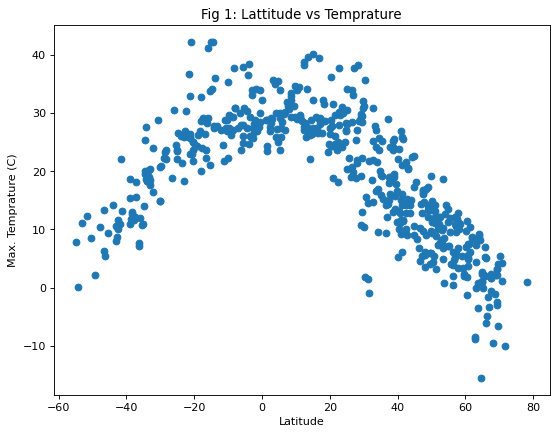

In [11]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

plt.title('Fig 1: Lattitude vs Temprature')
plt.xlabel("Latitude")
plt.ylabel("Max. Temprature (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

# Lattitude vs Humidity

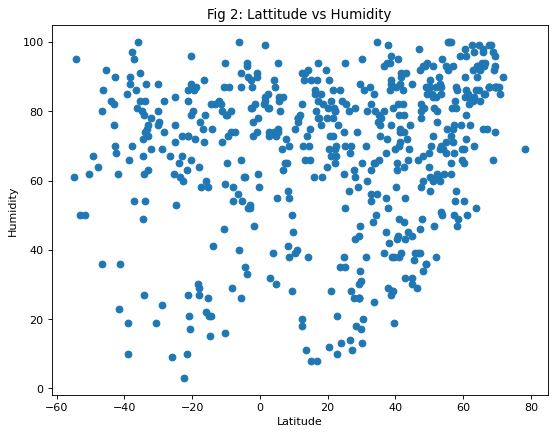

In [12]:
# Build the scatter plots for latitude vs. humidity

# Incorporate the other graph properties
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

plt.title('Fig 2: Lattitude vs Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

# Lattitude vs Cloudiness

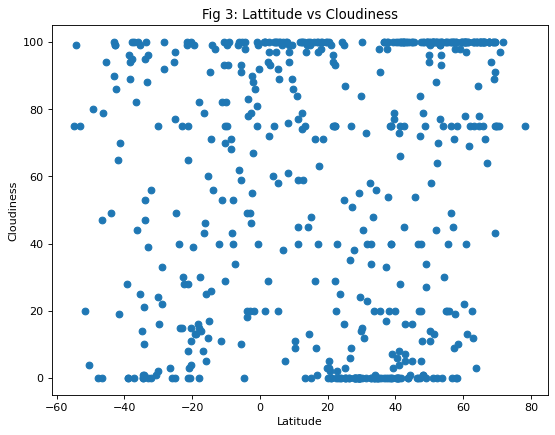

In [13]:
# Build the scatter plots for latitude vs. cloudiness

# Incorporate the other graph properties
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

plt.title('Fig 3: Lattitude vs Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

# Lattiude vs Windyness

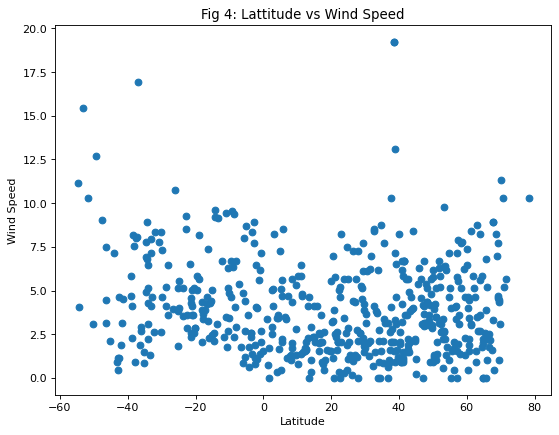

In [14]:
# Build the scatter plots for latitude vs. cloudiness

# Incorporate the other graph properties
# resizeing the figure
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

plt.title('Fig 4: Lattitude vs Wind Speed')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

# Linnear Regressions

In [15]:
# get southern data
south = pd.DataFrame(city_data_df.loc[city_data_df['Lat'].astype(float)<=0])
south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Timezone,Date
City ID,,,,,,,,,,
0,Alfenas,-21.4292,-45.9472,25.82,63,99,2.32,BR,-10800,1697382706
2,Saint-Pierre,-21.3393,55.4781,25.82,73,0,2.57,RE,14400,1697382707
7,Waitangi,-43.9535,-176.5597,14.23,83,49,7.15,NZ,49500,1697382709
8,Port-aux-Français,-49.3500,70.2167,2.19,67,80,12.68,TF,18000,1697382709
9,East London,-33.0153,27.9116,20.31,76,96,7.96,ZA,7200,1697382709


In [16]:
# get northan Hemospher
north = pd.DataFrame(city_data_df[city_data_df['Lat'].astype(float)>=0])
north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Timezone,Date
City ID,,,,,,,,,,
1,Iqaluit,63.7506,-68.5145,0.85,86,100,3.60,CA,-14400,1697382707
3,Tiksi,71.6872,128.8694,-10.05,90,100,5.69,RU,32400,1697382707
4,Kashgar,39.4547,75.9797,17.75,19,77,1.59,CN,28800,1697382708
5,Timbuktu,16.7735,-3.0074,39.46,8,1,2.53,ML,0,1697382708
6,Isafjordur,66.0755,-23.1240,5.02,93,100,1.03,IS,0,1697382708


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, plt_name, text_coordinates):
    
    # Compute linear regression, get values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #create equation for graphing
    regress_values = x_values * slope + intercept
    # create equation to be shown on plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
#the line plot
    plt.plot(x_values,regress_values,"r-")
# the line equation, shown on plot
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
# axis labling
    plt.xlabel("Latitude")
    plt.ylabel(title)
#plot title
    plt.title(plt_name)
#show r value on plot
    print(f"The r-value is: {rvalue**2}")
# create plot
    plt.show()

# North Temprature vs Lattitude Regression

The r-value is: 0.7518650340951757


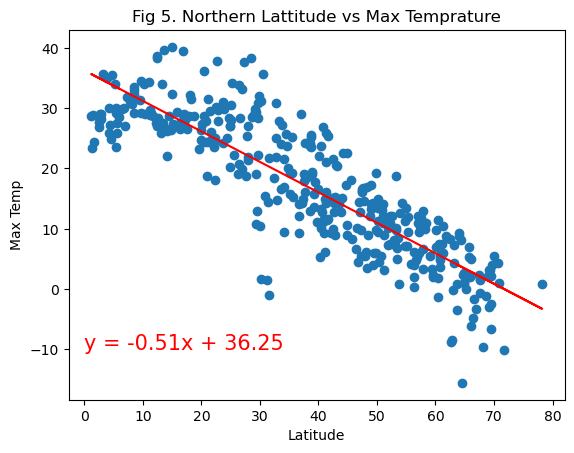

<Figure size 640x480 with 0 Axes>

In [19]:
plot_linear_regression(north['Lat'], north['Max Temp'], 'Max Temp' ,'Fig 5. Northern Lattitude vs Max Temprature', (0,-10))
# Save the figure
plt.savefig("Fig5.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

The r-value is: 0.6493294191096158


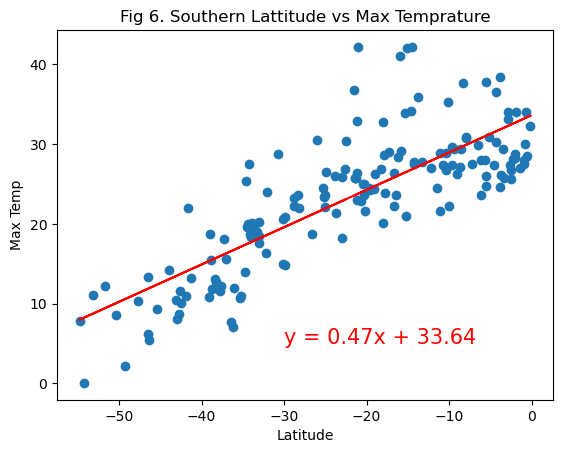

<Figure size 640x480 with 0 Axes>

In [20]:
plot_linear_regression(south['Lat'], south['Max Temp'], 'Max Temp' ,'Fig 6. Southern Lattitude vs Max Temprature', (-30,5))
# Save the figure
plt.savefig("Fig6.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

**Discussion about the linear relationship:** 
Both the Northen and Southern graphs show an increase in expected maximum temperature as the equator is approached, and a decrease as one approaches the portion of the world where there is ice all year (+/- 90 latitude is where the poles are). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06464769463880052


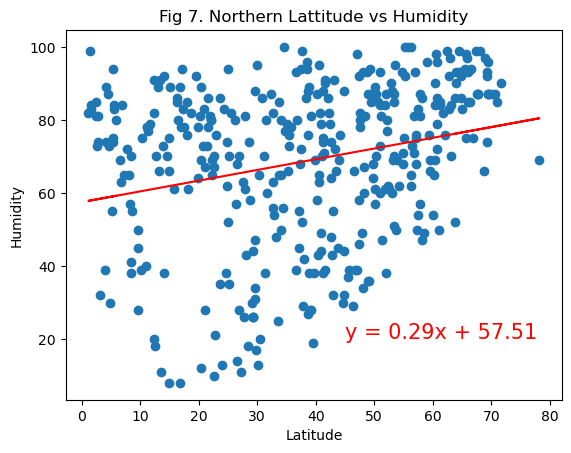

<Figure size 640x480 with 0 Axes>

In [21]:
plot_linear_regression(north['Lat'], north['Humidity'], 'Humidity' ,'Fig 7. Northern Lattitude vs Humidity', (45,20))
# Save the figure
plt.savefig("Fig7.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

The r-value is: 0.00048019266922366645


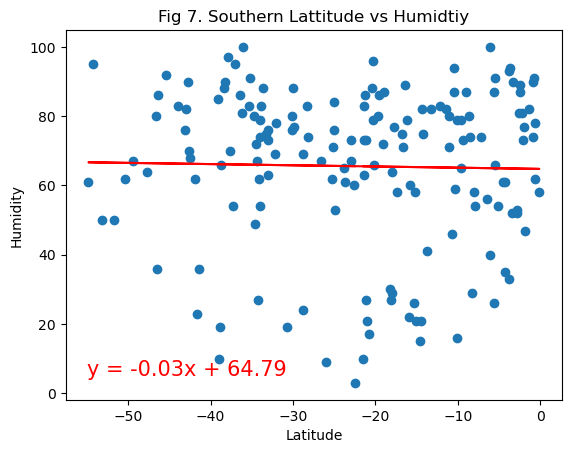

<Figure size 640x480 with 0 Axes>

In [25]:
plot_linear_regression(south['Lat'], south['Humidity'], 'Humidity' ,'Fig 7. Southern Lattitude vs Humidtiy', (-55,5))
# Save the figure
plt.savefig("Fig7.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

Discussion about the linear relationship: 
    The r values are very low, which suggests that there is not a strong relationship between the latitude and the humidity. Also there seems to be an upward direction to the northern humidity regression in the three times I have run the data collection portion of the program (I was trying to get a bigger sample for part 2). Some of this may be due to random chance, and the current season (winter in the north, summer in the south). 

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.017665806494205526


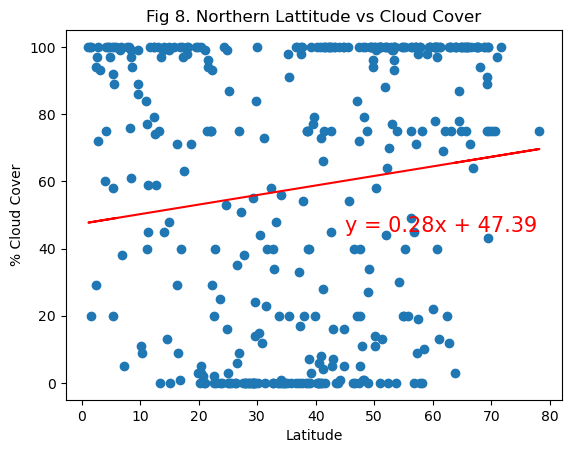

<Figure size 640x480 with 0 Axes>

In [26]:
plot_linear_regression(north['Lat'], north['Cloudiness'], '% Cloud Cover' ,'Fig 8. Northern Lattitude vs Cloud Cover', (45,45))
# Save the figure
plt.savefig("Fig8.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

The r-value is: 0.010367752357928896


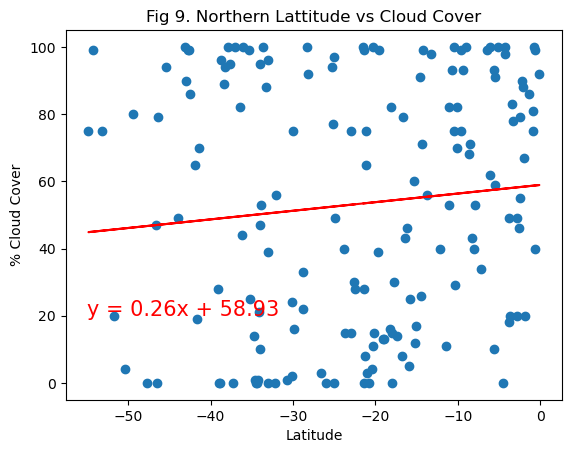

<Figure size 640x480 with 0 Axes>

In [27]:
plot_linear_regression(south['Lat'], south['Cloudiness'], '% Cloud Cover' ,'Fig 9. Northern Lattitude vs Cloud Cover', (-55,20))
# Save the figure
plt.savefig("Fig9.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

Discussion:
The relationship between clouds and latitude is very weak. This may be because the analysis is by latitude rather than geographic features that cause deserts. Also, the weather data was for current conditions. There may be a trend if the data was for a longer period of time. 

# Wind speed vs Lattitude Regression

The r-value is: 0.02772916885286597


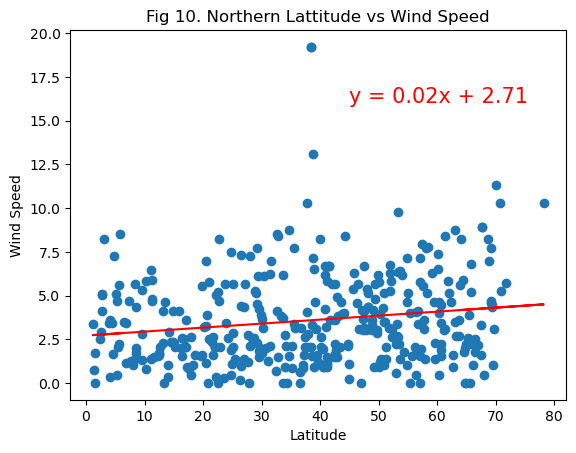

<Figure size 640x480 with 0 Axes>

In [31]:
plot_linear_regression(north['Lat'], north['Wind Speed'], 'Wind Speed' ,'Fig 10. Northern Lattitude vs Wind Speed', (45,16))
# Save the figure
plt.savefig("Fig10.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

The r-value is: 0.04133931562214952


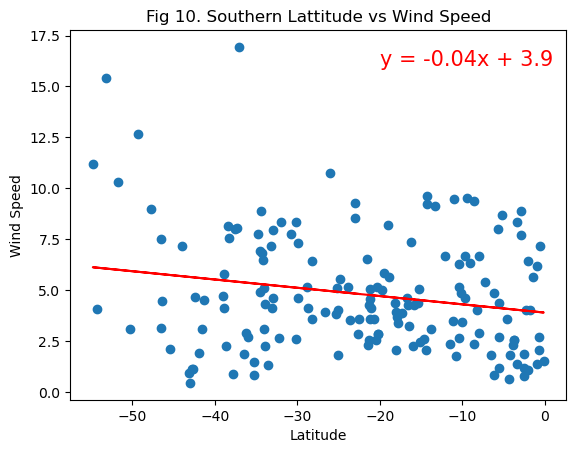

<Figure size 640x480 with 0 Axes>

In [32]:
plot_linear_regression(south['Lat'], south['Wind Speed'], 'Wind Speed' ,'Fig 10. Southern Lattitude vs Wind Speed', (-20,16))
# Save the figure
plt.savefig("Fig10.png")

# Print r value, Show plot in that order to get match to assignment
plt.show()

Discussion:
The relationship between the wind speed and the latitude is very weak, and the r value very low. This means that the local condonations / geography is more important than the latitude. 